## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [168]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [169]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [170]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [171]:
bitstamp.shape

(129540, 7)

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [172]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [173]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [174]:
coinbase.shape

(129540, 7)

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [175]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()  # same as .isna().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [176]:
bitstamp.dropna(inplace = True)
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [177]:
bitstamp.shape

(129067, 7)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [178]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$","", regex=False)

In [179]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [180]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype("float")

In [181]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [182]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

In [16]:
# No duplicates 

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [183]:
# Repeat Steps 1–4 for the coinbase DataFrame
# 1
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [184]:
#2
coinbase['Close'] = coinbase['Close'].str.replace("$","", regex=False)

In [185]:
#3
coinbase['Close'] = coinbase['Close'].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [186]:
#4
coinbase.duplicated().sum()

217

In [187]:
#4 to drop the buplicate
coinbase.drop_duplicates(inplace = True)
#check there is no duplicate
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [189]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp.loc[:, "Close"])

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [191]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
#coinbase_sliced = # YOUR CODE HERE
coinbase_sliced = pd.DataFrame(coinbase.loc[:, "Close"])

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [192]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [193]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

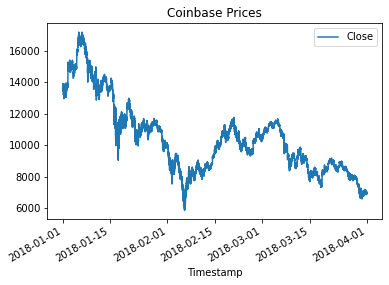

In [26]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(title = 'Coinbase Prices')

In [27]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization


<AxesSubplot:title={'center':'Bitstamp Price'}, xlabel='Timestamp'>

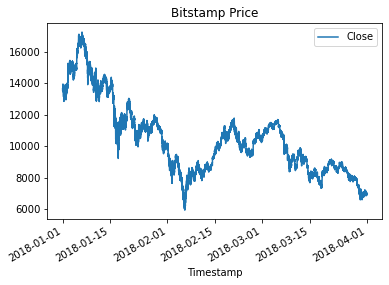

In [28]:
bitstamp_sliced.plot(title = 'Bitstamp Price')

In [29]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

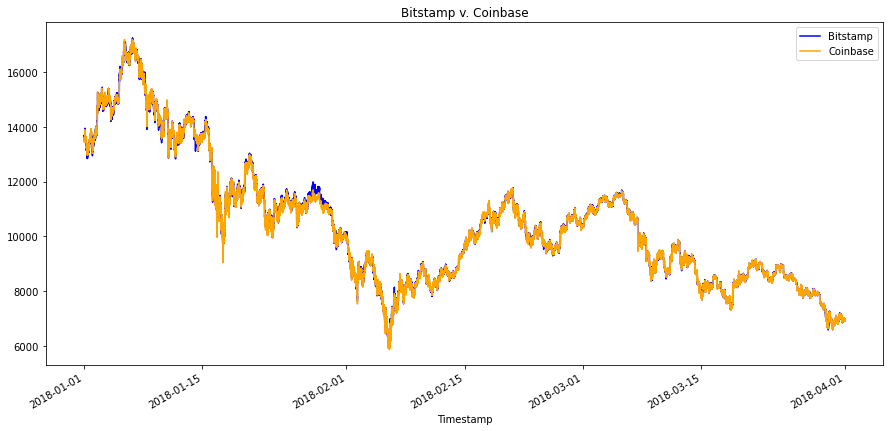

In [30]:
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [31]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for earlier period'}, xlabel='Timestamp'>

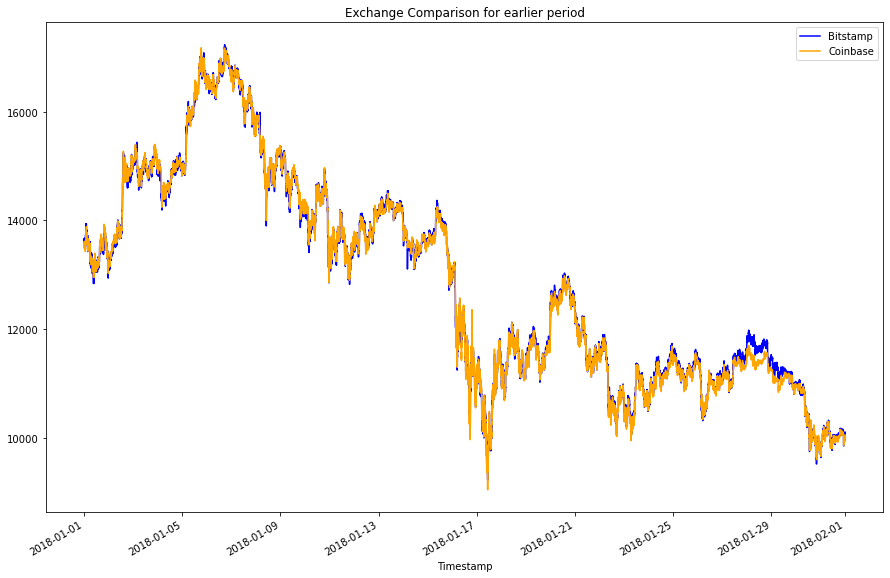

In [32]:
bitstamp_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for earlier period", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [33]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for later period'}, xlabel='Timestamp'>

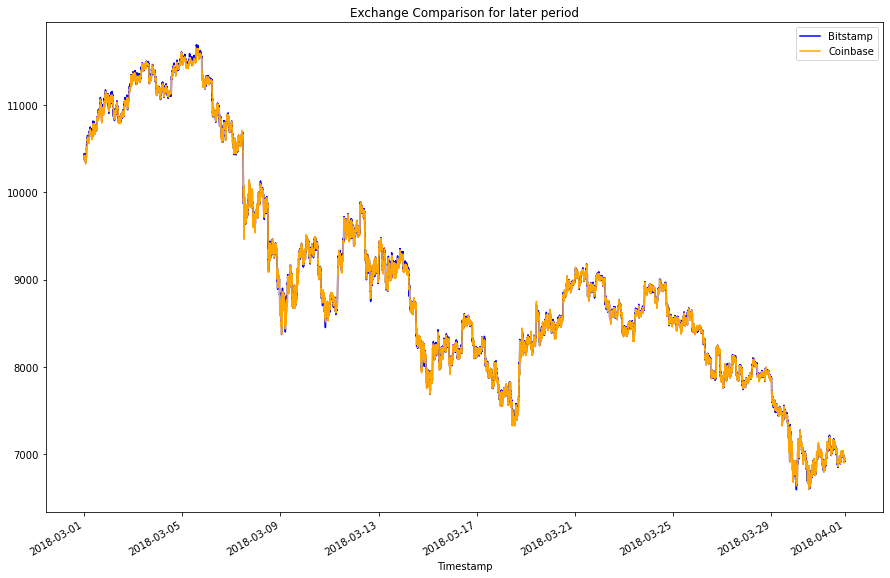

In [34]:
bitstamp_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for later period", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [ ]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period middle in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for middle period'}, xlabel='Timestamp'>

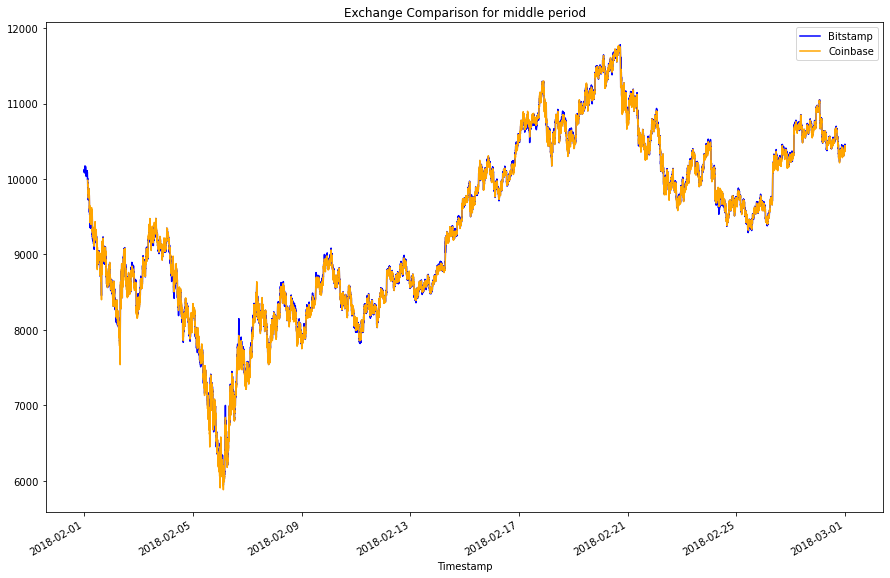

In [195]:

bitstamp_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for middle period", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Exchange Comparison for Jan, 29'}, xlabel='Timestamp'>

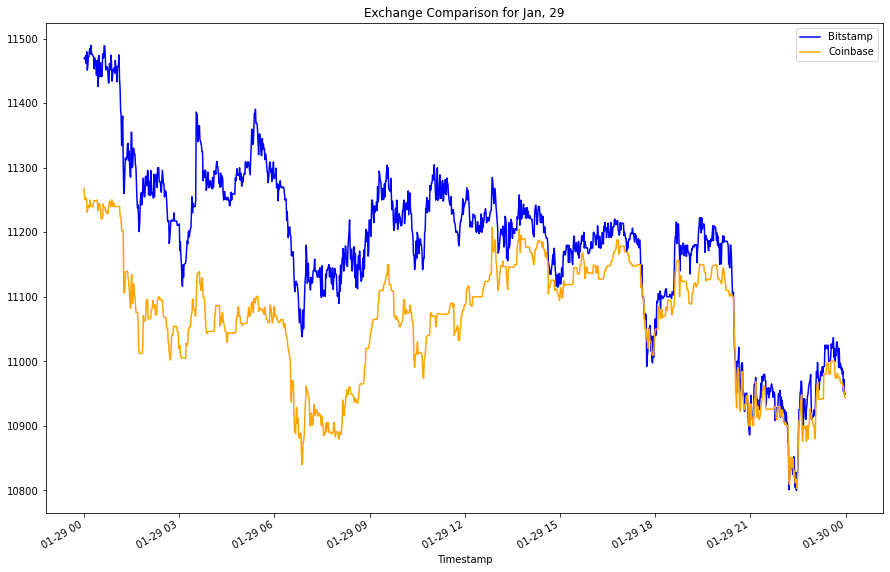

In [196]:
bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Jan, 29", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

# there seems a variation on Jan 29.



<AxesSubplot:title={'center':'Exchange Comparison for Feb, 06'}, xlabel='Timestamp'>

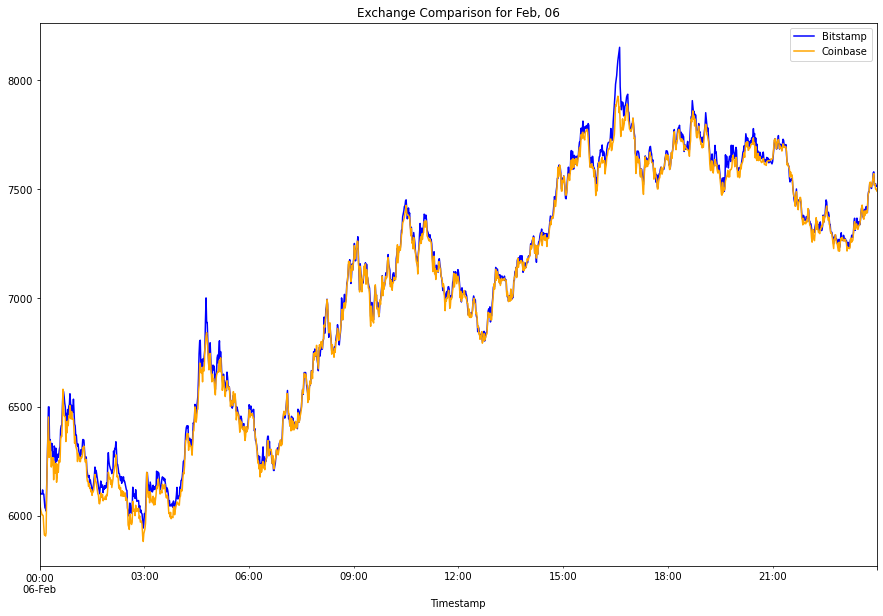

In [130]:
# February 6.

bitstamp_sliced['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Feb, 06", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [39]:
# Create an overlay plot that visualizes the two dataframes over a period of one day late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for March, 14'}, xlabel='Timestamp'>

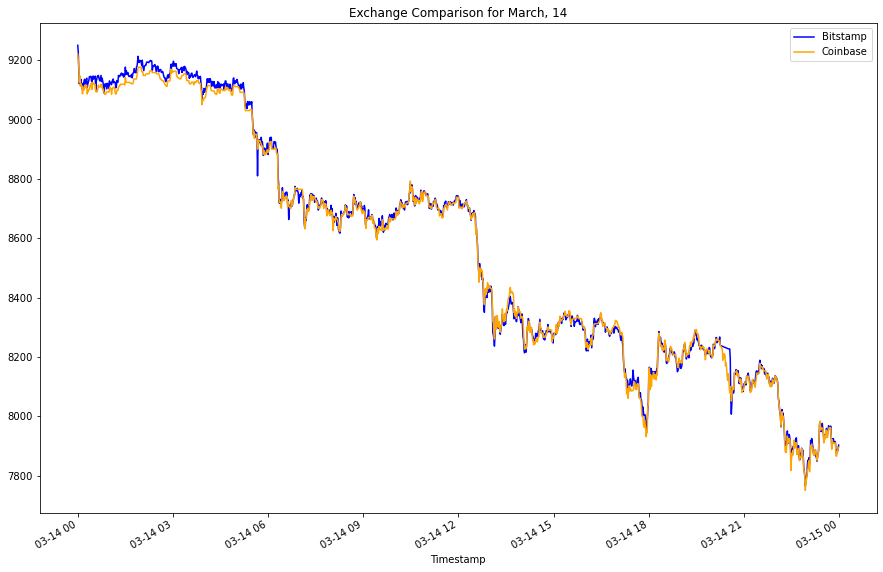

In [131]:
# March 14

bitstamp_sliced['Close'].loc['2018-03-14' : '2018-03-14'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for March, 14", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-14' : '2018-03-14'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [197]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'] -
bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29'])
    

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1430.000000
mean,-120.214510
std,85.164846
min,-300.270000
25%,-203.237500
50%,-132.420000
75%,-37.002500
max,48.010000


<AxesSubplot:>

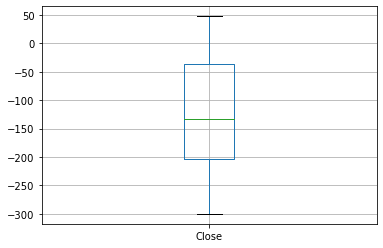

In [42]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.boxplot()

<AxesSubplot:title={'center':'Exchange Comparison for Feb, 6th 2018'}, xlabel='Timestamp'>

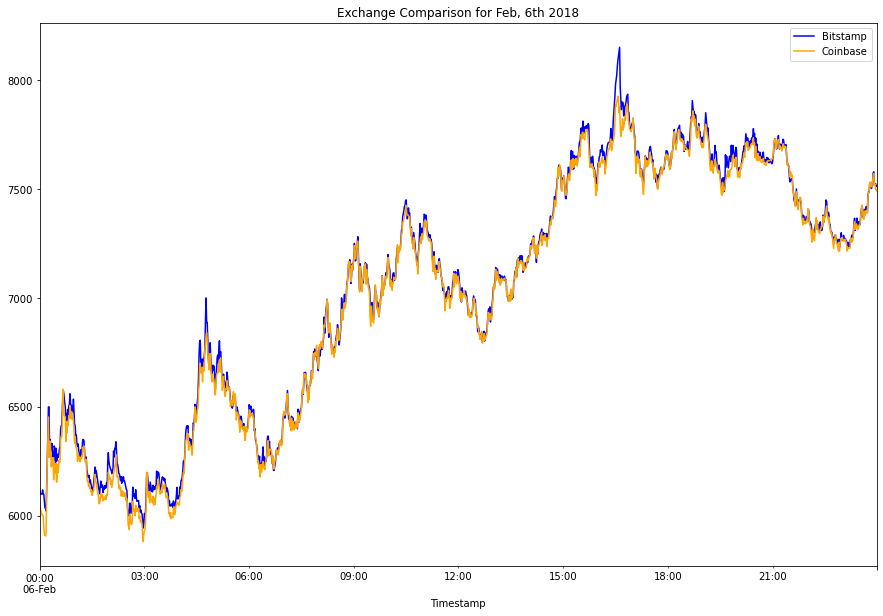

In [198]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Feb, 6th 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [199]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = pd.DataFrame(coinbase_sliced['Close'].loc['2018-02-06' : '2018-02-06'] -
bitstamp_sliced['Close'].loc['2018-02-06' : '2018-02-06'])

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1440.000000
mean,-23.841236
std,30.390321
min,-280.010000
25%,-37.877500
50%,-19.375000
75%,-4.675000
max,51.000000


In [200]:
arbitrage_spread_middle

,Close
Timestamp,
2018-02-06 00:00:00,-61.12
2018-02-06 00:01:00,-60.10
2018-02-06 00:02:00,-75.95
2018-02-06 00:03:00,-84.99
2018-02-06 00:04:00,-96.09
...,...
2018-02-06 23:55:00,1.87
2018-02-06 23:56:00,3.77
2018-02-06 23:57:00,-24.53


In [201]:
c_middle = coinbase_sliced['Close'].loc['2018-02-06' : '2018-02-06'] 
c_middle

Timestamp
2018-02-06 00:00:00    6061.32
2018-02-06 00:01:00    6040.00
2018-02-06 00:02:00    6025.05
2018-02-06 00:03:00    6015.11
2018-02-06 00:04:00    6004.01
                        ...   
2018-02-06 23:55:00    7519.00
2018-02-06 23:56:00    7523.49
2018-02-06 23:57:00    7500.01
2018-02-06 23:58:00    7500.00
2018-02-06 23:59:00    7491.00
Name: Close, Length: 1440, dtype: float64

In [202]:
b_middle = bitstamp_sliced['Close'].loc['2018-02-06' : '2018-02-06'] 
b_middle

Timestamp
2018-02-06 00:00:00    6122.44
2018-02-06 00:01:00    6100.10
2018-02-06 00:02:00    6101.00
2018-02-06 00:03:00    6100.10
2018-02-06 00:04:00    6100.10
                        ...   
2018-02-06 23:55:00    7517.13
2018-02-06 23:56:00    7519.72
2018-02-06 23:57:00    7524.54
2018-02-06 23:58:00    7511.52
2018-02-06 23:59:00    7514.65
Name: Close, Length: 1440, dtype: float64

In [110]:
0.01 * 10000  # this is the minimum spread of 0.01

100.0

In [123]:
spread.index.dtype

dtype('<M8[ns]')

In [203]:
# find days with spread > 100
spread = bitstamp.Close - coinbase.Close
spread_profitable = spread[spread>100]
spread_profitable[2950:3000]

Timestamp
2018-02-02 07:44:00    128.46
2018-02-02 07:45:00    109.98
2018-02-02 07:47:00    106.27
2018-02-02 07:48:00    103.01
2018-02-02 07:49:00    109.63
2018-02-02 17:15:00    122.11
2018-02-02 17:16:00    120.00
2018-02-02 18:11:00    100.49
2018-02-05 14:49:00    130.02
2018-02-05 14:50:00    104.65
2018-02-05 14:52:00    118.66
2018-02-05 14:53:00    107.00
2018-02-05 14:54:00    108.14
2018-02-05 14:56:00    120.35
2018-02-05 14:57:00    148.52
2018-02-05 14:58:00    159.18
2018-02-05 15:02:00    108.81
2018-02-05 15:03:00    139.41
2018-02-05 15:05:00    164.08
2018-02-05 15:07:00    180.82
2018-02-05 15:08:00    251.35
2018-02-05 15:09:00    254.00
2018-02-05 15:11:00    193.61
2018-02-05 15:13:00    158.00
2018-02-05 15:14:00    168.55
2018-02-05 15:15:00    148.43
2018-02-05 15:16:00    164.15
2018-02-05 15:17:00    108.98
2018-02-05 15:18:00    106.00
2018-02-05 15:19:00    128.84
2018-02-05 15:20:00    176.77
2018-02-05 15:21:00    119.56
2018-02-05 15:24:00    119.89


In [113]:
spread

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,61.04,61.04,29.44,37.99,-17.478201,-237968.956585,20.542373
2018-01-01 00:01:00,39.34,51.61,8.52,57.09,-10.811171,-146922.587122,50.905897
2018-01-01 00:02:00,15.49,15.49,30.06,30.22,-11.451707,-155637.052824,19.263741
2018-01-01 00:03:00,22.96,51.78,67.57,88.75,-9.145053,-123557.225342,63.028322
2018-01-01 00:04:00,85.01,50.40,69.66,36.56,-8.885699,-120558.608508,58.203928
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,-10.19,-8.99,-7.44,-7.44,-4.757935,-33003.883878,-3.319901
2018-03-31 23:56:00,-7.98,-7.99,-12.00,-9.69,2.444486,16913.455574,-8.745335
2018-03-31 23:57:00,-9.68,2.51,-9.68,0.81,27.462619,190406.876058,0.880358


<AxesSubplot:>

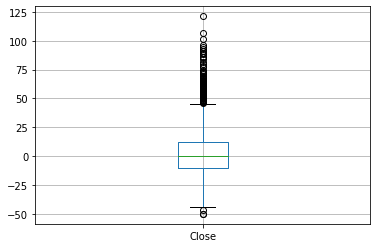

In [45]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.boxplot()

<AxesSubplot:title={'center':'Exchange Comparison for March, 14'}, xlabel='Timestamp'>

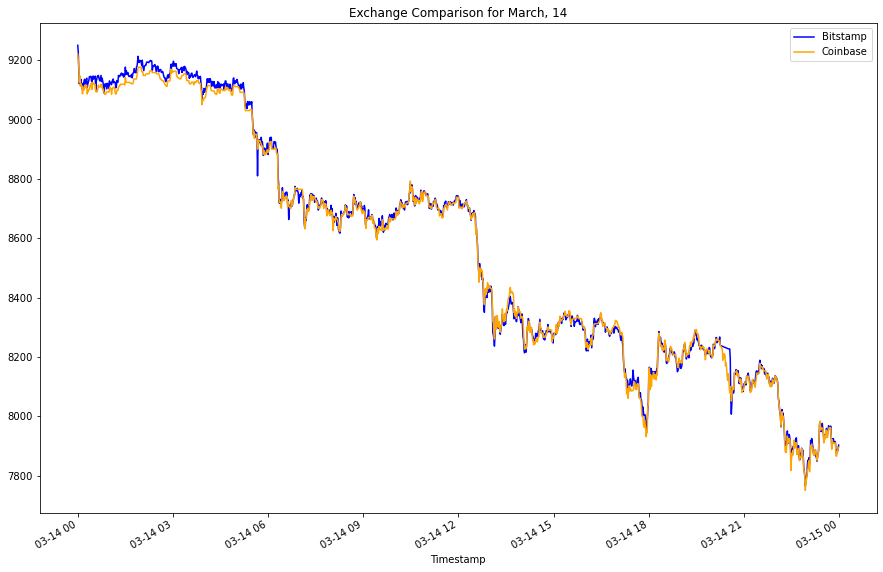

In [204]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
# March 14

bitstamp_sliced['Close'].loc['2018-03-14' : '2018-03-14'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for March, 14", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-14' : '2018-03-14'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [136]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = pd.DataFrame(coinbase_sliced['Close'].loc['2018-03-14' : '2018-03-14'] -
bitstamp_sliced['Close'].loc['2018-03-14' : '2018-03-14'])

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1425.000000
mean,-6.731404
std,16.322187
min,-147.650000
25%,-16.600000
50%,-6.000000
75%,2.910000
max,90.010000


<AxesSubplot:>

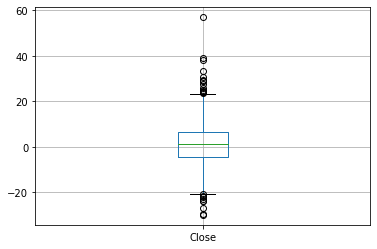

In [48]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.boxplot()

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [205]:
be  = bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29']
be.isnull().sum()
be.shape

(1430,)

In [206]:
ce  = coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29']
ce.isnull().sum()
ce.shape

(1440,)

In [207]:
arbitrage_spread_early.shape

(1440, 1)

In [208]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = pd.DataFrame(bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29'] -
coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
condition = arbitrage_spread_early['Close']>0
positive_early = arbitrage_spread_early[condition]
positive_early.describe()

# bitstmap was higher than coinbase 

,Close
count,1379.000000
mean,124.976425
std,82.959829
min,0.570000
25%,41.885000
50%,144.380000
75%,204.135000
max,300.270000


In [209]:
arbitrage_spread_early.shape

(1440, 1)

In [210]:
# for februray 6(middle) bitstamp was mostly highter than coinbase

arbitrage_spread_middle = pd.DataFrame(bitstamp_sliced['Close'].loc['2018-02-06' : '2018-02-06'] -
coinbase_sliced['Close'].loc['2018-02-06' : '2018-02-06'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
condition = arbitrage_spread_middle['Close']>0
positive_middle = arbitrage_spread_middle[condition]
positive_middle.describe()

,Close
count,1177.000000
mean,31.294452
std,28.481383
min,0.010000
25%,13.000000
50%,24.530000
75%,42.540000
max,280.010000


In [211]:
# for late period , March 14.

arbitrage_spread_late = pd.DataFrame(coinbase_sliced['Close'].loc['2018-03-14' : '2018-03-14'] -
bitstamp_sliced['Close'].loc['2018-03-14' : '2018-03-14'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
condition = arbitrage_spread_late['Close']>0
positive_late = arbitrage_spread_late[condition]
positive_late.describe()
# coinsebase is trading higher than the bitstamp 

,Close
count,466.000000
mean,9.724914
std,9.707754
min,0.010000
25%,3.017500
50%,6.975000
75%,12.757500
max,90.010000


In [212]:
positive_early.index.shape



(1379,)

In [213]:
coinbase_early.loc[positive_early.index,:]

,Close
Timestamp,
2018-01-29 00:00:00,11268.01
2018-01-29 00:01:00,11252.99
2018-01-29 00:02:00,11250.77
2018-01-29 00:03:00,11250.77
2018-01-29 00:04:00,11252.99
...,...
2018-01-29 23:54:00,10966.50
2018-01-29 23:55:00,10961.37
2018-01-29 23:57:00,10953.52


In [214]:
positive_middle.index.shape

(1177,)

In [215]:
positive_middle

,Close
Timestamp,
2018-02-06 00:00:00,61.12
2018-02-06 00:01:00,60.10
2018-02-06 00:02:00,75.95
2018-02-06 00:03:00,84.99
2018-02-06 00:04:00,96.09
...,...
2018-02-06 23:53:00,14.01
2018-02-06 23:54:00,8.54
2018-02-06 23:57:00,24.53


In [216]:
coinbase_middle

,Close
Timestamp,
2018-02-06 00:00:00,6061.32
2018-02-06 00:01:00,6040.00
2018-02-06 00:02:00,6025.05
2018-02-06 00:03:00,6015.11
2018-02-06 00:04:00,6004.01
...,...
2018-02-06 23:55:00,7519.00
2018-02-06 23:56:00,7523.49
2018-02-06 23:57:00,7500.01


In [217]:
coinbase_middle.loc[positive_middle.index,:]

,Close
Timestamp,
2018-02-06 00:00:00,6061.32
2018-02-06 00:01:00,6040.00
2018-02-06 00:02:00,6025.05
2018-02-06 00:03:00,6015.11
2018-02-06 00:04:00,6004.01
...,...
2018-02-06 23:53:00,7559.99
2018-02-06 23:54:00,7570.00
2018-02-06 23:57:00,7500.01


In [218]:
positive_late.index.shape

(466,)

In [219]:
coinbase_late.loc[positive_late.index,:]

,Close
Timestamp,
2018-03-14 00:02:00,9179.72
2018-03-14 00:03:00,9125.03
2018-03-14 00:04:00,9147.16
2018-03-14 00:49:00,9095.00
2018-03-14 00:50:00,9090.00
...,...
2018-03-14 23:35:00,7952.98
2018-03-14 23:41:00,7959.67
2018-03-14 23:43:00,7962.00


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [220]:
arbitrage_spread_early.isnull().sum()

Close    10
dtype: int64

In [221]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
coinbase_early =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'], columns=['Close'])
coinbase_early_positive = coinbase_early.loc[positive_early.index,:]
spread_return_early= arbitrage_spread_early / coinbase_early_positive

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True)
spread_return_early

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541
...,...
2018-01-29 23:54:00,0.001231
2018-01-29 23:55:00,0.002155
2018-01-29 23:57:00,0.001672


In [91]:

# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
coinbase_early =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'], columns=['Close'])
coinbase_early_positive = coinbase_early.loc[positive_early.index,:]
spread_return_early= arbitrage_spread_early / coinbase_early_positive

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True)
spread_return_early

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541
...,...
2018-01-29 23:54:00,0.001231
2018-01-29 23:55:00,0.002155
2018-01-29 23:57:00,0.001672


In [92]:
# early dataset 

# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
coinbase_early =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'], columns=['Close'])
coinbase_early_positive = coinbase_early.loc[positive_early.index,:]
spread_return_early= arbitrage_spread_early / coinbase_early_positive

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True)
spread_return_early

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541
...,...
2018-01-29 23:54:00,0.001231
2018-01-29 23:55:00,0.002155
2018-01-29 23:57:00,0.001672


In [222]:
# For  middle date dataset
coinbase_middle =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-02-06' : '2018-02-06'], columns=['Close'])
coinbase_middle_positive = coinbase_middle.loc[positive_middle.index,:]
spread_return_middle= arbitrage_spread_middle / coinbase_middle_positive

# Review the spread return DataFrame
spread_return_middle.dropna(inplace=True)
spread_return_middle

,Close
Timestamp,
2018-02-06 00:00:00,0.010084
2018-02-06 00:01:00,0.009950
2018-02-06 00:02:00,0.012606
2018-02-06 00:03:00,0.014129
2018-02-06 00:04:00,0.016004
...,...
2018-02-06 23:53:00,0.001853
2018-02-06 23:54:00,0.001128
2018-02-06 23:57:00,0.003271


In [223]:
# for the late dataset
coinbase_late =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-03-14' : '2018-03-14'], columns=['Close'])
coinbase_late_positive = coinbase_late.loc[positive_late.index,:]
spread_return_late= arbitrage_spread_late / coinbase_late_positive

# Review the spread return DataFrame
spread_return_late.dropna(inplace=True)
spread_return_late

,Close
Timestamp,
2018-03-14 00:02:00,0.001637
2018-03-14 00:03:00,0.000551
2018-03-14 00:04:00,0.000400
2018-03-14 00:49:00,0.000331
2018-03-14 00:50:00,0.000102
...,...
2018-03-14 23:35:00,0.001147
2018-03-14 23:41:00,0.000430
2018-03-14 23:43:00,0.000313


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [224]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early['Close']>0.01]

# Review the first five profitable trades
profitable_trades_early.head()

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541


In [225]:
# for  middle data set
profitable_trades_middle = spread_return_middle[spread_return_middle['Close']>0.01]
profitable_trades_middle.head()
# the profitbale data points are 5

,Close
Timestamp,
2018-02-06 00:00:00,0.010084
2018-02-06 00:02:00,0.012606
2018-02-06 00:03:00,0.014129
2018-02-06 00:04:00,0.016004
2018-02-06 00:05:00,0.019154


In [226]:
# for late dataset
profitable_trades_late = spread_return_late[spread_return_late['Close']>0.01]
profitable_trades_late.head()
# the profitable data point is 1.

,Close
Timestamp,
2018-03-14 05:40:00,0.010113


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [227]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

,Close
count,742.000000
mean,0.017795
std,0.003142
min,0.010021
25%,0.015371
50%,0.018233
75%,0.020063
max,0.027075


In [228]:
# for the middle dataset
profitable_trades_middle.describe()

,Close
count,110.000000
mean,0.014312
std,0.005292
min,0.010084
25%,0.010822
50%,0.012209
75%,0.015809
max,0.036984


In [229]:
# for late dataset
profitable_trades_late.describe()

,Close
count,1.000000
mean,0.010113
std,NaN
min,0.010113
25%,0.010113
50%,0.010113
75%,0.010113
max,0.010113


In [ ]:
# ANSWER:  which of the 3 has larger mean out of the three dates : The January 29 has higher mean than February 6 and March 14.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [230]:
profitable_trades_early.head()

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541


In [61]:
bitstamp_sliced['Close'].loc['2018-01-29'].head()

Timestamp
2018-01-29 00:00:00    11469.99
2018-01-29 00:01:00    11469.99
2018-01-29 00:02:00    11467.99
2018-01-29 00:03:00    11473.99
2018-01-29 00:04:00    11461.63
Name: Close, dtype: float64

In [231]:
profit_early = profitable_trades_early * pd.DataFrame(bitstamp_sliced['Close'].loc['2018-01-29'])
profit_early = profit_early.dropna()
profit_early

,Close
Timestamp,
2018-01-29 00:00:00,205.600508
2018-01-29 00:01:00,221.184577
2018-01-29 00:02:00,221.413893
2018-01-29 00:03:00,227.648779
2018-01-29 00:04:00,212.508363
...,...
2018-01-29 12:24:00,117.763564
2018-01-29 12:31:00,129.926193
2018-01-29 12:33:00,123.269349


In [232]:
# profitbale_trades_middle 
profitable_trades_middle.head()

,Close
Timestamp,
2018-02-06 00:00:00,0.010084
2018-02-06 00:02:00,0.012606
2018-02-06 00:03:00,0.014129
2018-02-06 00:04:00,0.016004
2018-02-06 00:05:00,0.019154


In [233]:
# profitbale_trades_late 

In [161]:
profitable_trades_late.head()

,Close
Timestamp,
2018-03-14 05:40:00,0.010113


In [162]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * pd.DataFrame(bitstamp_sliced['Close'].loc['2018-01-29'])

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

,Close
Timestamp,
2018-01-29 00:00:00,205.600508
2018-01-29 00:01:00,221.184577
2018-01-29 00:02:00,221.413893
2018-01-29 00:03:00,227.648779
2018-01-29 00:04:00,212.508363
...,...
2018-01-29 12:24:00,117.763564
2018-01-29 12:31:00,129.926193
2018-01-29 12:33:00,123.269349


In [234]:
# for middle, February 6
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * pd.DataFrame(bitstamp_sliced['Close'].loc['2018-02-06'])

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle


,Close
Timestamp,
2018-02-06 00:00:00,61.736310
2018-02-06 00:02:00,76.907403
2018-02-06 00:03:00,86.190859
2018-02-06 00:04:00,97.627854
2018-02-06 00:05:00,117.202702
...,...
2018-02-06 17:05:00,81.866596
2018-02-06 19:39:00,121.064433
2018-02-06 19:41:00,93.642398


In [236]:
#For the late, March 14.
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * pd.DataFrame(bitstamp_sliced['Close'].loc['2018-03-14'])

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

,Close
Timestamp,
2018-03-14 05:40:00,89.099686


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [237]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe()

,Close
count,742.000000
mean,200.333292
std,35.816052
min,112.323620
25%,172.656840
50%,204.567757
75%,225.427580
max,308.399667


In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

<AxesSubplot:xlabel='Timestamp'>

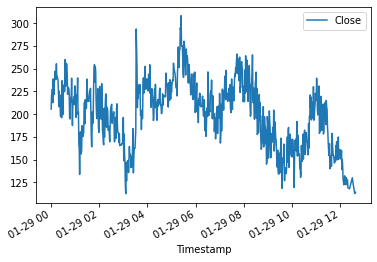

In [238]:
profit_early.plot()

In [239]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_middle.describe()

,Close
count,110.000000
mean,96.438246
std,42.725661
min,61.736310
25%,68.954441
50%,81.013015
75%,108.232513
max,289.997975


<AxesSubplot:xlabel='Timestamp'>

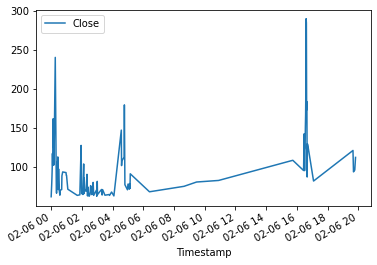

In [240]:
# Plot the results for the middle profit per trade DataFrame
# YOUR CODE HERE
profit_middle.plot()

In [241]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_late.describe()

,Close
count,1.000000
mean,89.099686
std,NaN
min,89.099686
25%,89.099686
50%,89.099686
75%,89.099686
max,89.099686


<AxesSubplot:xlabel='Timestamp'>

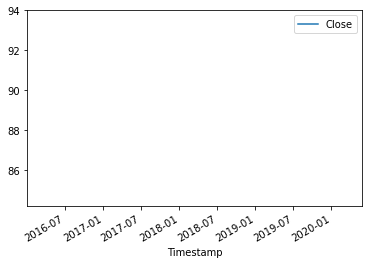

In [242]:
# Plot the results for the late profit per trade DataFrame
# YOUR CODE HERE
profit_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [243]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early.sum()

Close    148647.302574
dtype: float64

In [244]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_middle.sum()

Close    10608.207038
dtype: float64

In [245]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_late.sum()

Close    89.099686
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [246]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()
cumulative_profit_early

,Close
Timestamp,
2018-01-29 00:00:00,205.600508
2018-01-29 00:01:00,426.785085
2018-01-29 00:02:00,648.198978
2018-01-29 00:03:00,875.847756
2018-01-29 00:04:00,1088.356119
...,...
2018-01-29 12:24:00,148167.677697
2018-01-29 12:31:00,148297.603890
2018-01-29 12:33:00,148420.873240


<AxesSubplot:xlabel='Timestamp'>

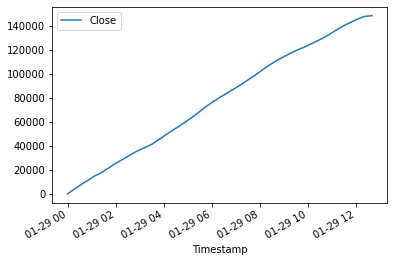

In [247]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

In [248]:

# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_middle = profit_middle.cumsum()
cumulative_profit_middle

,Close
Timestamp,
2018-02-06 00:00:00,61.736310
2018-02-06 00:02:00,138.643714
2018-02-06 00:03:00,224.834573
2018-02-06 00:04:00,322.462426
2018-02-06 00:05:00,439.665128
...,...
2018-02-06 17:05:00,10185.360758
2018-02-06 19:39:00,10306.425190
2018-02-06 19:41:00,10400.067589


<AxesSubplot:xlabel='Timestamp'>

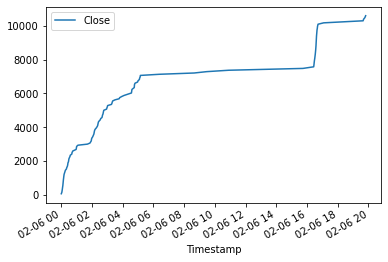

In [249]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot()

In [ ]:
#ealry on there was a lot of spread b/n bistamp and coin base later flatout , later very little spread such as on march there was only one day you can make money .

In [250]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_late.cumsum()
cumulative_profit_late

,Close
Timestamp,
2018-03-14 05:40:00,89.099686


<AxesSubplot:xlabel='Timestamp'>

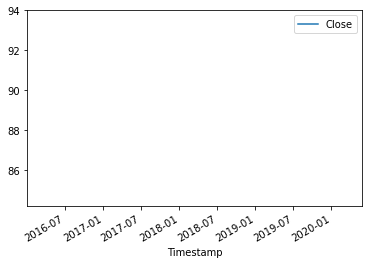

In [251]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE

In [ ]:
#At the early period of the trade , there was significant spread to make profit , while in the middel and late period of the trade the
#spread is not  significant to make profit ,the spread is getting narrower at the middle and the late period .